In [49]:
lencable = 26
cablespan = 25
Larm = .25
dap = .25 * Larm
dpdp = .75* Larm
g = 9.8
mshuttle = 16


In [117]:
import math
def func(t, x, u):
    u1, u2, u3 = u
    x1, x2, x3, x4, x5, x6, x7, x8 = x
    dx3 = (2*Larm**2*u1*math.cos(x1)*math.sin(x1)+2*Larm*u1*(dap+dpdp-Larm*math.cos(x1))*math.sin(x1))/(2*math.sqrt((dap+dpdp-Larm*math.cos(x1))**2+Larm**2*math.sin(x1)**2))+(2*Larm**2*u1*math.cos(x1)*math.sin(x1)-2*Larm*u1*(-dap+Larm*math.cos(x1))*math.sin(x1))/(2*math.sqrt((-dap+Larm*math.cos(x1))**2+Larm**2*math.sin(x1)**2))+(2*Larm**2*u2*math.cos(x2)*math.sin(x2)+2*Larm*u2*(dap+dpdp-Larm*math.cos(x2))*math.sin(x2))/(2*math.sqrt((dap+dpdp-Larm*math.cos(x2))**2+Larm**2*math.sin(x2)**2))+(2*Larm**2*u2*math.cos(x2)*math.sin(x2)-2*Larm*u2*(-dap+Larm*math.cos(x2))*math.sin(x2))/(2*math.sqrt((-dap+Larm*math.cos(x2))**2+Larm**2*math.sin(x2)**2))

    dx5 = (2*dx3*(lencable-x3)+2*u3*(lencable-x3)-2*dx3*x4)/(2*cablespan)
    dx6 = (2*u3*x4-((2*dx3*(lencable-x3)+2*u3*(lencable-x3)-2*dx3*x4)*(cablespan**2-(lencable-x3)**2+2*(lencable-x3)*x4))/(2*cablespan**2))/(2*math.sqrt(x4**2-(cablespan**2-(lencable-x3)**2+2*(lencable-x3)*x4)**2/(4*cablespan**2)))
    dx7 = -((dx6*g*mshuttle*x4*(cablespan-x5))/(cablespan*x6**2))-(dx5*g*mshuttle*x4)/(cablespan*x6)+(g*mshuttle*u3*(cablespan-x5))/(cablespan*x6)
    dx8 = (dx6*(-g*lencable*mshuttle*x5+g*mshuttle*x3*x5+g*mshuttle*x4*x5))/(cablespan*x6**2)-(-dx5*g*lencable*mshuttle+dx5*g*mshuttle*x3+dx5*g*mshuttle*x4+dx3*g*mshuttle*x5+g*mshuttle*u3*x5)/(cablespan*x6)

    return np.array([u1, u2, dx3, u3, dx5, dx6, dx7, dx8])

In [114]:
import numpy as np

In [115]:
from scipy.integrate import RK45
max_angle = math.pi * 8/9
def get_output(x):
    larm, rarm, takeup, dist, x, y, tl, tr = x
    lout = 0
    rout = 0
    v = 0
    if dist > 20:
        if larm < 2.7:
            lout = 1

        if rarm > 0:
            rout = -1
        if larm >= 2.7 and rarm <= 0:
            v = 1
        else:
            v = 0
    else:
        v = 1

    
    return np.array([0, 0, 1])

def get_start_array(larm, rarm):
    
    takeup = math.sqrt(dap**2+Larm**2-2*dap*Larm*math.cos(larm))+math.sqrt((dap+dpdp)**2+Larm**2-2*(dap+dpdp)*Larm*math.cos(larm))+math.sqrt(dap**2+Larm**2-2*dap*Larm*math.cos(rarm))+math.sqrt((dap+dpdp)**2+Larm**2-2*(dap+dpdp)*Larm*math.cos(rarm))
    print(lencable - takeup)
    poscable = ((lencable - takeup)**2 - cablespan**2)/(2 * (lencable - takeup)) +1 
    print((poscable**2-(cablespan**2+2*poscable*(lencable-takeup)-(lencable-takeup)**2)**2/(4*cablespan**2)))
    print(poscable**2-(cablespan**2+2*poscable*(lencable-takeup)-(lencable-takeup)**2)**2/(4*cablespan**2))
    x = (cablespan**2+2*poscable*(lencable-takeup)-(lencable-takeup)**2)/(2*cablespan)
    y = math.sqrt(poscable**2-(cablespan**2+2*poscable*(lencable-takeup)-(lencable-takeup)**2)**2/(4*cablespan**2))
    tl = (g*mshuttle*poscable*(cablespan-x))/(cablespan*y)
    tr = -((-g*lencable*mshuttle*x+g*mshuttle*poscable*x+g*mshuttle*takeup*x)/(cablespan*y))
    return np.array([larm, rarm, takeup, poscable, x, y, tl, tr])
    

In [135]:
sim_time = 50
sim_step_time = 0.02
left_arm_start_angle = 1.1
right_arm_start_angle = 1.1
cable_length = 26
stake_span = 25
max_dist = .5 * (cable_length + stake_span)
print(max_dist)
start_state = get_start_array(left_arm_start_angle, right_arm_start_angle)
print(start_state)
integrator = RK45(lambda t, x: func(t, x, get_output(x)), 0, start_state, sim_time, sim_step_time)
time = []

output = np.zeros((0, 8))
for step in range(int(sim_time / sim_step_time)):
    if integrator.y[3] >= stake_span - start_state[3]:
        print("Max sim distance hit, exiting")
        print(integrator.y[3])
        break
    try:
        integrator.step()
    except ValueError as e:
        print(f"Sim step failed, exiting: at {integrator.y[3]}")
        break
    
    output = np.append(output,[integrator.y],axis= 0)
    time.append(integrator.t)
    


    

25.5
25.020229097305112
0.03923174224796888
0.03923174224796888
[1.10000000e+00 1.10000000e+00 9.79770903e-01 1.02022092e+00
 1.00080916e+00 1.98070044e-01 7.75314803e+02 7.60588781e+02]
Max sim distance hit, exiting
23.980220919594238


In [136]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'X vs Right Tension')

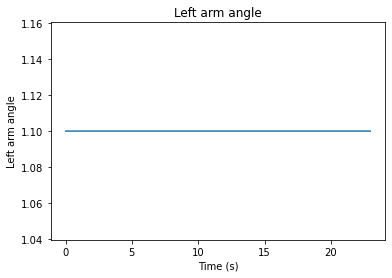

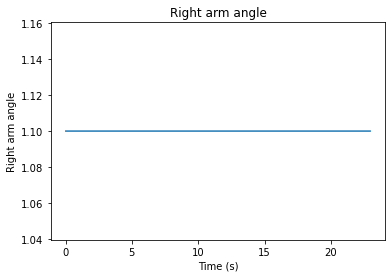

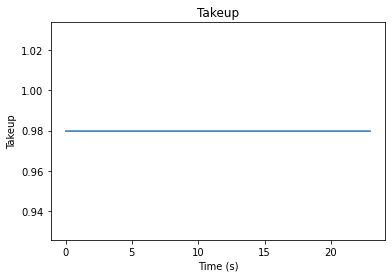

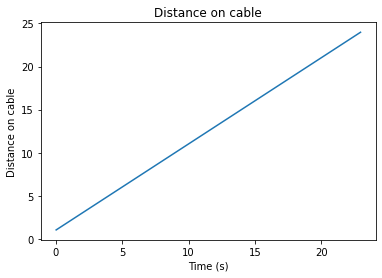

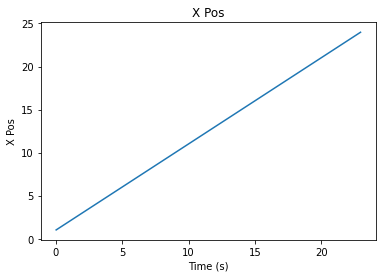

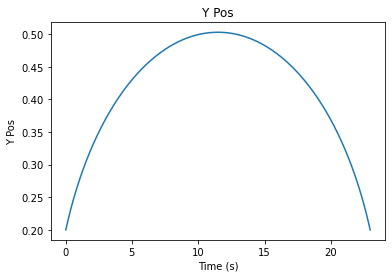

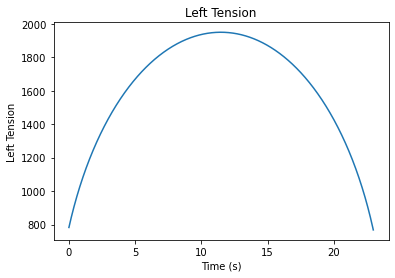

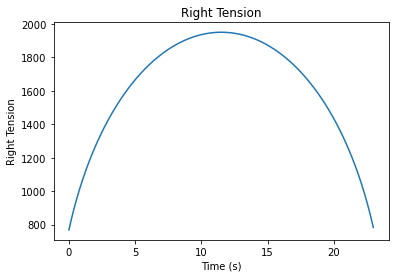

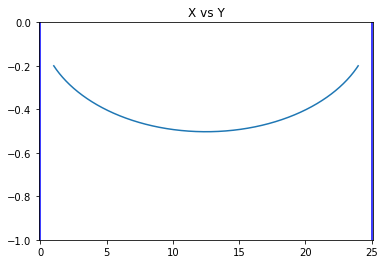

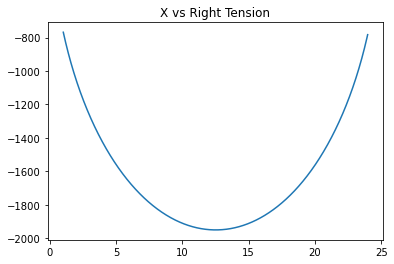

In [137]:
var_list = ["Left arm angle", "Right arm angle", "Takeup", "Distance on cable", "X Pos", "Y Pos", "Left Tension", "Right Tension"]
for state in range(output.shape[1]):
    plt.figure()
    plt.plot(time, output[:, state])
    plt.title(var_list[state])
    plt.xlabel("Time (s)")
    plt.ylabel(f"{var_list[state]}")

plt.figure()
plt.plot(output[:, 4], -1 * output[:, 5])
plt.title("X vs Y")
plt.ylim([-1, 0])
plt.axvline(x = 0, color = 'b')
plt.axvline(x = 25, color = 'b')

plt.figure()
plt.plot(output[:, 4], -1 * output[:, 7])
plt.title("X vs Right Tension")

In [42]:
25 - np.min(output[:, 4][output[:, 7] > 5000])

0.3047145631331354

array([  256.85689491,   279.4857255 ,   300.43742049, ...,
       11119.8631368 , 13605.31432747, 19362.70432103])

In [ ]:
math.sqrt(poscable**2-(cablespan**2+2*poscable*(lencable-takeup)-(lencable-takeup)**2)**2/(4*cablespan**2))